## **Sentiment Analysis**

## Importing Libraries

In [115]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
import kagglehub
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import warnings
warnings.filterwarnings('ignore')

## Importing Data 1

In [116]:
path = kagglehub.dataset_download("abhi8923shriv/sentiment-analysis-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Maddox\.cache\kagglehub\datasets\abhi8923shriv\sentiment-analysis-dataset\versions\9


In [117]:
import os
files = os.listdir(path)
files

['test.csv',
 'testdata.manual.2009.06.14.csv',
 'train.csv',
 'training.1600000.processed.noemoticon.csv']

In [118]:
path1=path+'/'+files[0]
path2=path+'/'+files[1]
path3=path+'/'+files[2]
path4=path+'/'+files[3]
display(path1)

'C:\\Users\\Maddox\\.cache\\kagglehub\\datasets\\abhi8923shriv\\sentiment-analysis-dataset\\versions\\9/test.csv'

In [119]:
import pandas as pd
df1 = pd.read_csv(path1, encoding="iso-8859-1")

In [120]:
display(df1.sample(5))
display(df1.shape)
display(df1.columns)
display(df1.info())


,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
4293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213,a172818c9e,misses my Mom today. She was my Best Friend an...,positive,morning,46-60,Benin,12123200.0,112760.0,108.0
4454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(4815, 9)

Index(['textID', 'text', 'sentiment', 'Time of Tweet', 'Age of User',
       'Country', 'Population -2020', 'Land Area (Km²)', 'Density (P/Km²)'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4815 entries, 0 to 4814
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            3534 non-null   object 
 1   text              3534 non-null   object 
 2   sentiment         3534 non-null   object 
 3   Time of Tweet     3534 non-null   object 
 4   Age of User       3534 non-null   object 
 5   Country           3534 non-null   object 
 6   Population -2020  3534 non-null   float64
 7   Land Area (Km²)   3534 non-null   float64
 8   Density (P/Km²)   3534 non-null   float64
dtypes: float64(3), object(6)
memory usage: 338.7+ KB


None

In [121]:
df2 = pd.read_csv(path2, encoding='utf-8')
display(df2.sample(2))
display(df2.shape)
display(df2.info())

,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,"@stellargirl I loooooooovvvvvveee my Kindle2. Not that the DX is cool, but the 2 is fantastic in its own right."
220,0,588,Mon Jun 08 06:55:01 UTC 2009,car warranty call,painhatelove,@KarrisFoxy If you're being harassed by calls ...
390,0,2385,Tue Jun 02 03:16:42 UTC 2009,time warner,dcwhip,could time-warner cable suck more? NO.


(515, 6)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 6 columns):
 #   Column                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                           --------------  ----- 
 0   4                                                                                                                515 non-null    int64 
 1   3                                                                                                                515 non-null    int64 
 2   Mon May 11 03:17:40 UTC 2009                                                                                     515 non-null    object
 3   kindle2                                                                                                          515 non-null    object
 4   tpryan                                       

None

In [122]:
df3 = pd.read_csv(path3, encoding="iso-8859-1")
display(df3.sample(5))
display(df3.shape)
display(df3.columns)
display(df3.info())

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
20607,b973c046be,really wants to go see the script in NY in aug...,but no one will go with me,negative,morning,46-60,Yemen,29825964,527970.0,56
3831,8584428904,Now that`s a very nice way to fall asleep.,nice,positive,morning,46-60,Guinea,13132795,246000.0,53
23110,9710662c1d,I`m sick! it sucks! IM me! ohbabayy33,I`m sick! it sucks!,negative,noon,60-70,Malaysia,32365999,328550.0,99
4488,33537ffd4d,is excited to see Samantha&Denise again http:...,excited,positive,morning,0-20,Belarus,9449323,202910.0,47
13416,3dbc0f7847,but i love your haaaaair!,i love,positive,morning,0-20,Greece,10423054,128900.0,81


(27481, 10)

Index(['textID', 'text', 'selected_text', 'sentiment', 'Time of Tweet',
       'Age of User', 'Country', 'Population -2020', 'Land Area (Km²)',
       'Density (P/Km²)'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            27481 non-null  object 
 1   text              27480 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         27481 non-null  object 
 4   Time of Tweet     27481 non-null  object 
 5   Age of User       27481 non-null  object 
 6   Country           27481 non-null  object 
 7   Population -2020  27481 non-null  int64  
 8   Land Area (Km²)   27481 non-null  float64
 9   Density (P/Km²)   27481 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 2.1+ MB


None

In [123]:
df4 = pd.read_csv(path4, encoding="iso-8859-1")
display(df4.sample(5))
display(df4.shape)
display(df4.columns)
display(df4.info())

,polarity of tweet,id of the tweet,date of the tweet,query,user,text of the tweet
736643,0,2265055608,Sun Jun 21 05:40:23 PDT 2009,NO_QUERY,laposeidon,my whole body is aching... didnt thought the ...
204624,0,1972665596,Sat May 30 09:39:18 PDT 2009,NO_QUERY,philt13,"is watching the babarians on tv digital txt, o..."
837742,4,1558855874,Sun Apr 19 09:35:26 PDT 2009,NO_QUERY,itsmatthewryan,Showerrr.
242736,0,1981381534,Sun May 31 09:02:01 PDT 2009,NO_QUERY,portsidetwd,What happened? Massive cloud blotted out the s...
214042,0,1975144274,Sat May 30 14:32:20 PDT 2009,NO_QUERY,mayapeep,I want to come home


(1048572, 6)

Index(['polarity of tweet ', 'id of the tweet', 'date of the tweet', 'query',
       'user', 'text of the tweet '],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048572 entries, 0 to 1048571
Data columns (total 6 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   polarity of tweet   1048572 non-null  int64 
 1   id of the tweet     1048572 non-null  int64 
 2   date of the tweet   1048572 non-null  object
 3   query               1048572 non-null  object
 4   user                1048572 non-null  object
 5   text of the tweet   1048572 non-null  object
dtypes: int64(2), object(4)
memory usage: 48.0+ MB


None

## Importing Data 2 , 0-negative, 4=positive

In [124]:
path5 = kagglehub.dataset_download("kazanova/sentiment140")

print("Path to dataset files:", path5)

Path to dataset files: C:\Users\Maddox\.cache\kagglehub\datasets\kazanova\sentiment140\versions\2


In [125]:
fullpath=path5+'/'+os.listdir(path5)[0]
fullpath
df5 = pd.read_csv(fullpath, encoding="iso-8859-1")
display(df5.sample(5))
display(df5.shape)
display(df5.columns)
display(df5.info())

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
277784,0,1991363708,Mon Jun 01 06:54:16 PDT 2009,NO_QUERY,lilworkerb,I can barely keep my eyes open! The bed is cal...
229103,0,1978408031,Sat May 30 23:16:00 PDT 2009,NO_QUERY,elabao,So bloody tired from 3 basketball games all in...
1174039,4,1980885578,Sun May 31 07:55:07 PDT 2009,NO_QUERY,rpalumbo,"@max2sky That sucks, you have to love laundry ..."
633739,0,2233097269,Thu Jun 18 20:49:49 PDT 2009,NO_QUERY,lexlex916,i know and i don't want to walk by myself and ...
871959,4,1678849128,Sat May 02 07:53:16 PDT 2009,NO_QUERY,_amberlovely,@claireyjones yayayayayyy. it's gonna be class...


(1599999, 6)

Index(['0', '1467810369', 'Mon Apr 06 22:19:45 PDT 2009', 'NO_QUERY',
       '_TheSpecialOne_',
       '@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column                                                                                                               Non-Null Count    Dtype 
---  ------                                                                                                               --------------    ----- 
 0   0                                                                                                                    1599999 non-null  int64 
 1   1467810369                                                                                                           1599999 non-null  int64 
 2   Mon Apr 06 22:19:45 PDT 2009                                                                                         1599999 non-null  object
 3   NO_QUERY                                                                                                             1599999 non-null  object
 4   _

None

In [126]:
#renaming columns
cols=['target','id','date', 'flag', 'user','text']
df5 = pd.read_csv(fullpath, names=cols, encoding="iso-8859-1")
df_data=df5
display(df_data.sample())

,target,id,date,flag,user,text
666714,0,2245375100,Fri Jun 19 16:02:37 PDT 2009,NO_QUERY,Tj_pinkgurl,Biggest headache in the world


In [127]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Maddox\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [128]:
#we can remove these words
print(stopwords.words('english')) #These words will not add any context to understand(for ML model)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

## EDA

In [129]:
df_data.isnull().sum()

target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64

<Axes: >

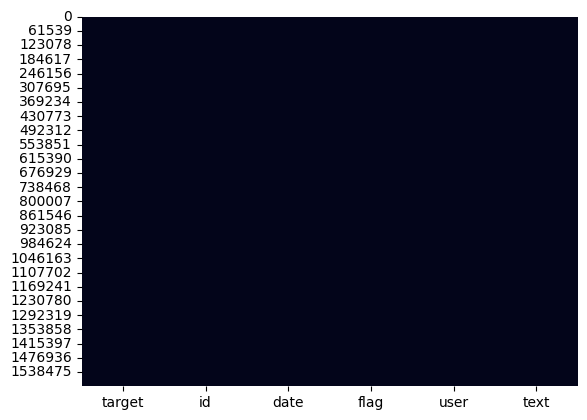

In [ ]:
#visualize missing values for all columns
sns.heatmap(df_data.isna(), cbar=False)

In [131]:
df_data.duplicated().sum()

np.int64(0)

In [132]:
print("number of unique values in the dataset:")
for i in cols:
    print(f'{i} : {df_data[i].value_counts().count()}')
display(df_data['target'].value_counts())
display(df_data['flag'].value_counts())

number of unique values in the dataset:
target : 2
id : 1598315
date : 774363
flag : 1
user : 659775
text : 1581466


target
0    800000
4    800000
Name: count, dtype: int64

flag
NO_QUERY    1600000
Name: count, dtype: int64

lets just change the label from 4 -> 1

In [ ]:
df_data['target']=df_data['target'].replace(4,1)

In [136]:
df_data['target'].value_counts()

target
0    800000
1    800000
Name: count, dtype: int64

removing flag,user,id column because there in nothing in there which is relevent to outr project

In [134]:
df_data=df_data.drop('flag', axis=1)

In [135]:
display(df_data.sample())
df_data.columns

,target,id,date,user,text
1497922,1,2070468950,Sun Jun 07 17:45:02 PDT 2009,howtobehuge,@Kevin_Lately I agree but try telling HIM that...


Index(['target', 'id', 'date', 'user', 'text'], dtype='object')

## Stemming
just removing stopwords, keep the keywords for classification

In [ ]:
port_stem=PorterStemmer